bier127_NNHwith2OPT

Iteration 124: Improved total distance to 138826.97
Iteration 125: Improved total distance to 131572.12
Iteration 193: Improved total distance to 131168.29
Iteration 228: Improved total distance to 128470.18
Iteration 270: Improved total distance to 127733.53
Iteration 2206: Improved total distance to 127556.14
Iteration 2207: Improved total distance to 127060.35
Iteration 2927: Improved total distance to 126946.54
Iteration 3225: Improved total distance to 126521.55
Iteration 3507: Improved total distance to 126202.66
Iteration 4310: Improved total distance to 126025.43
Iteration 6136: Improved total distance to 125821.91
Iteration 6224: Improved total distance to 125662.73
Iteration 6281: Improved total distance to 125353.16
Iteration 7146: Improved total distance to 124918.75
Iteration 7471: Improved total distance to 124583.24
Iteration 7606: Improved total distance to 124524.27
Iteration 7898: Improved total distance to 122888.04
Iteration 7916: Improved total distance to 122809.7

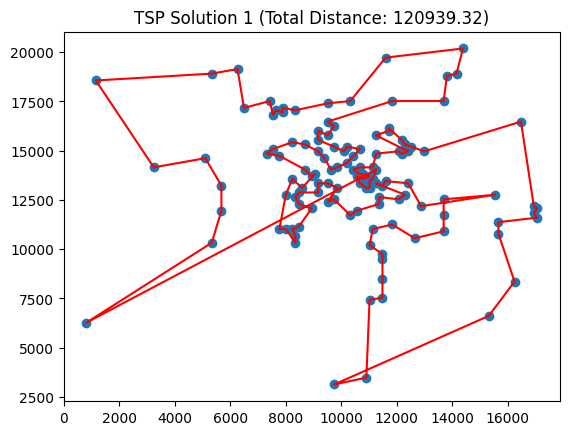

Iteration 475: Improved total distance to 128723.41
Iteration 678: Improved total distance to 127177.67
Iteration 748: Improved total distance to 126993.81
Iteration 2417: Improved total distance to 126951.30
Iteration 3419: Improved total distance to 126765.34
Iteration 3874: Improved total distance to 126554.93
Iteration 4453: Improved total distance to 125790.57
Iteration 6599: Improved total distance to 125426.04
Iteration 6749: Improved total distance to 125416.30
Iteration 6750: Improved total distance to 125252.49
Iteration 6751: Improved total distance to 125239.82
Iteration 6796: Improved total distance to 125147.39
Iteration 6797: Improved total distance to 124971.83
Iteration 6798: Improved total distance to 124446.02
Iteration 6843: Improved total distance to 123950.23
Iteration 7097: Improved total distance to 123483.39
Iteration 7316: Improved total distance to 123394.77
Iteration 7499: Improved total distance to 123373.47
Iteration 7853: Improved total distance to 122351

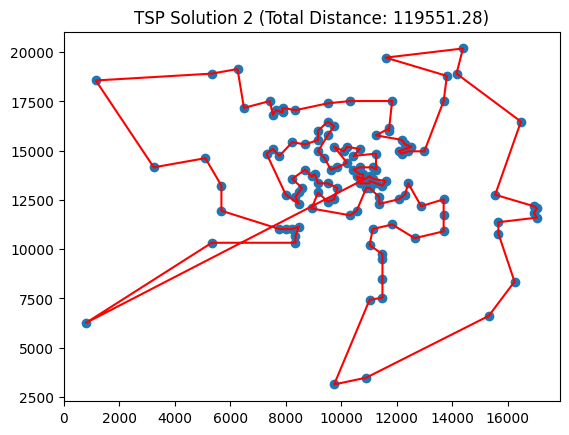

Iteration 2309: Improved total distance to 123682.05
Iteration 2414: Improved total distance to 123587.12
Iteration 2723: Improved total distance to 123092.93
Iteration 2818: Improved total distance to 122626.40
Iteration 3323: Improved total distance to 122347.12
Iteration 5176: Improved total distance to 122011.61
Iteration 5575: Improved total distance to 121952.63
Iteration 5986: Improved total distance to 121710.96
Iteration 7282: Improved total distance to 121597.15
Iteration 7853: Improved total distance to 119840.22
Iteration 8294: Improved total distance to 119727.28
Iteration 11286: Improved total distance to 119127.71
Iteration 13446: Improved total distance to 118317.12
Iteration 15724: Improved total distance to 117503.94


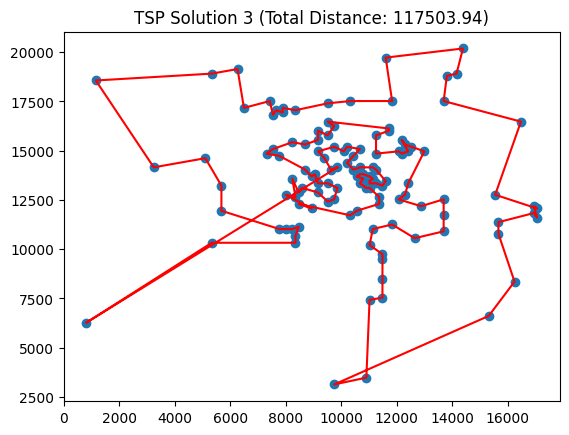

Iteration 2380: Improved total distance to 128982.73
Iteration 2484: Improved total distance to 128966.10
Iteration 2989: Improved total distance to 128732.33
Iteration 3073: Improved total distance to 128265.80
Iteration 3079: Improved total distance to 127808.02
Iteration 5081: Improved total distance to 127747.32
Iteration 5155: Improved total distance to 126644.05
Iteration 5176: Improved total distance to 126622.75
Iteration 6285: Improved total distance to 126504.91
Iteration 6938: Improved total distance to 126304.06
Iteration 7744: Improved total distance to 125595.74
Iteration 7844: Improved total distance to 124628.41
Iteration 9469: Improved total distance to 124382.50
Iteration 10575: Improved total distance to 123729.51
Iteration 11369: Improved total distance to 123279.55
Iteration 13982: Improved total distance to 123147.85
Iteration 14266: Improved total distance to 123147.61
Iteration 14269: Improved total distance to 122875.48
Iteration 14322: Improved total distance 

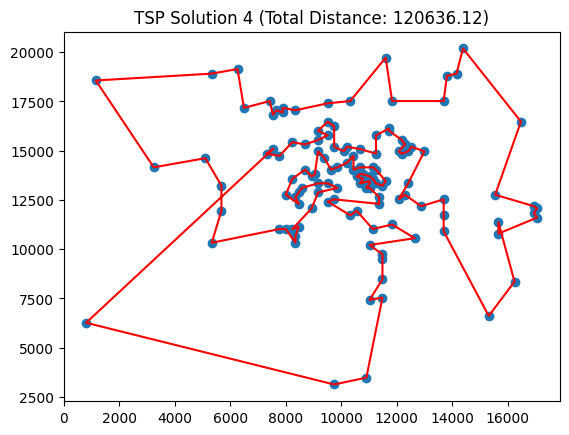

Iteration 123: Improved total distance to 134086.45
Iteration 251: Improved total distance to 133844.77
Iteration 1319: Improved total distance to 133120.79
Iteration 2283: Improved total distance to 133112.96
Iteration 2461: Improved total distance to 132646.44
Iteration 2467: Improved total distance to 132188.65
Iteration 4717: Improved total distance to 131853.14
Iteration 4992: Improved total distance to 131740.20
Iteration 6557: Improved total distance to 131460.91
Iteration 7251: Improved total distance to 131234.54
Iteration 7624: Improved total distance to 131120.73
Iteration 7884: Improved total distance to 130662.44
Iteration 7885: Improved total distance to 130163.34
Iteration 7886: Improved total distance to 130014.53
Iteration 8126: Improved total distance to 129786.64
Iteration 8130: Improved total distance to 129634.94
Iteration 8131: Improved total distance to 128855.62
Iteration 8133: Improved total distance to 127171.91
Iteration 10107: Improved total distance to 1271

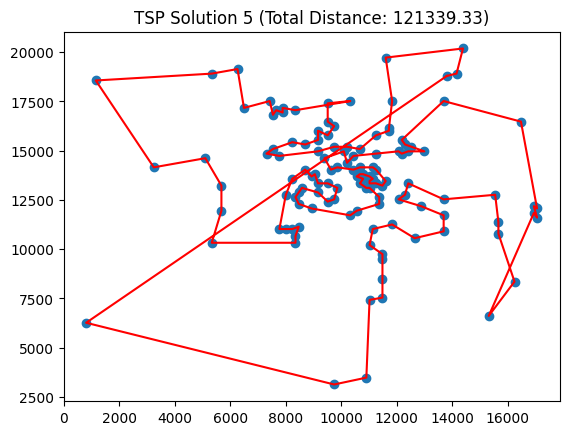

Average Tour Length: 119993.99911127402


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

# Rerun TSP solving process 5 times
for i in range(5):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


bier127_NNHonly

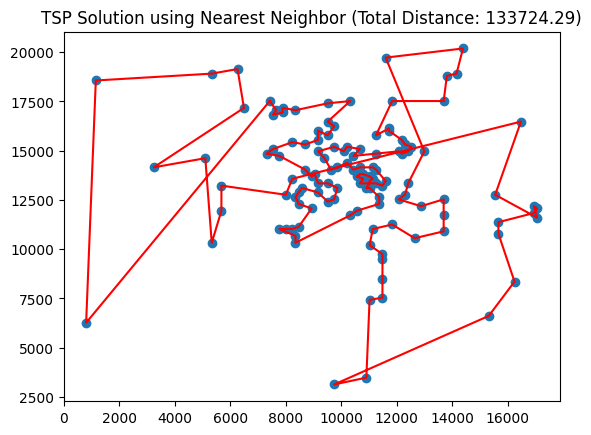

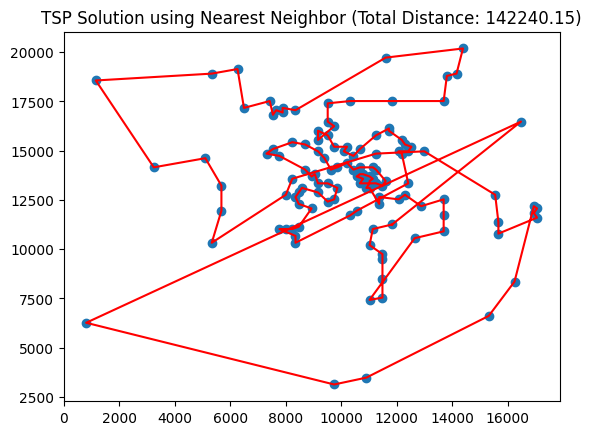

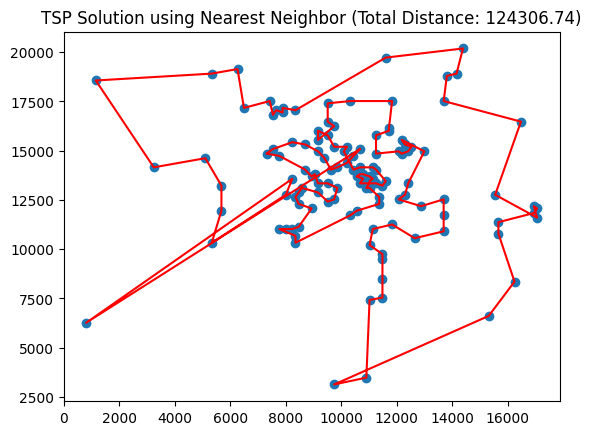

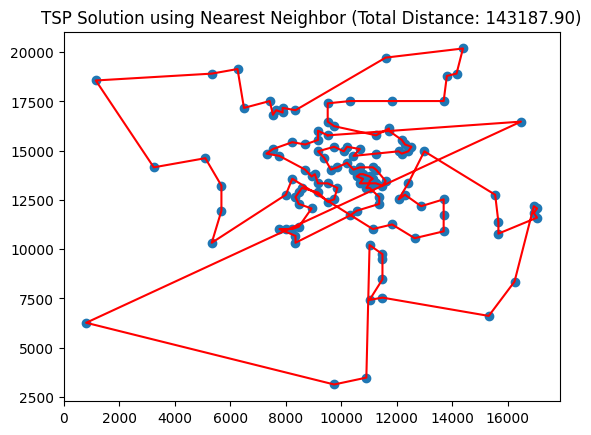

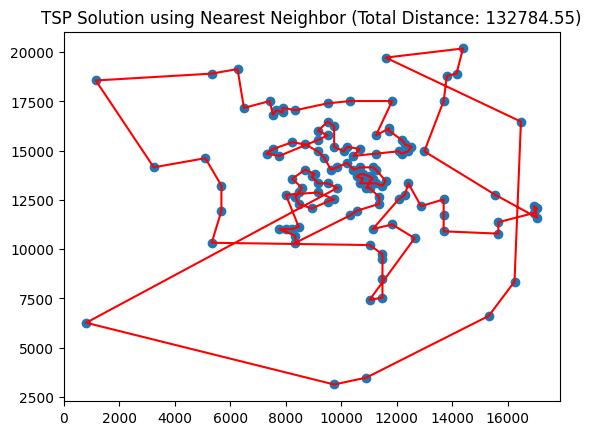

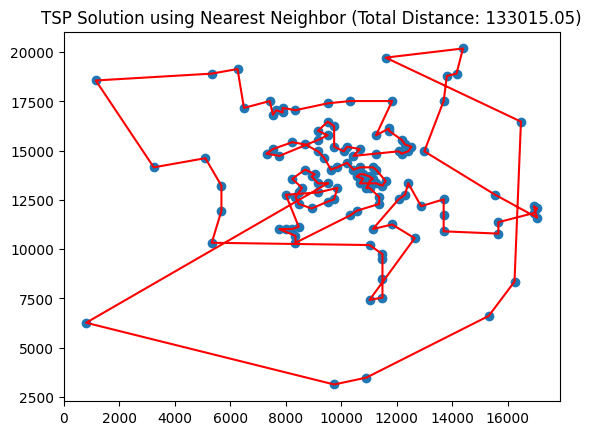

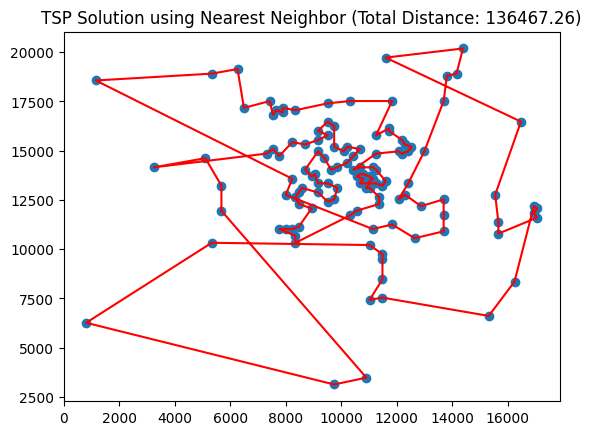

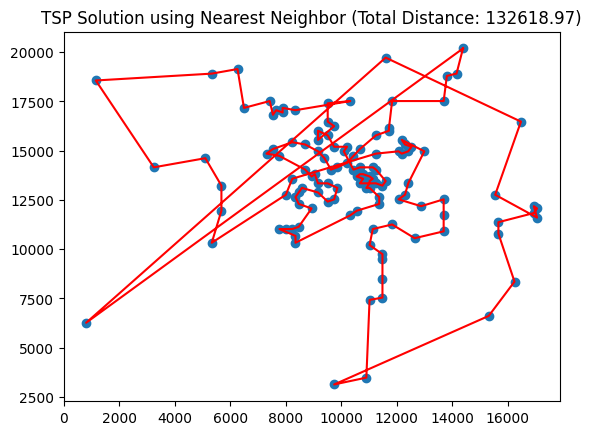

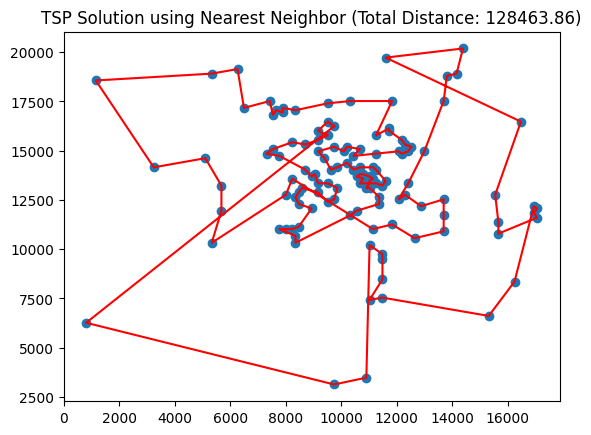

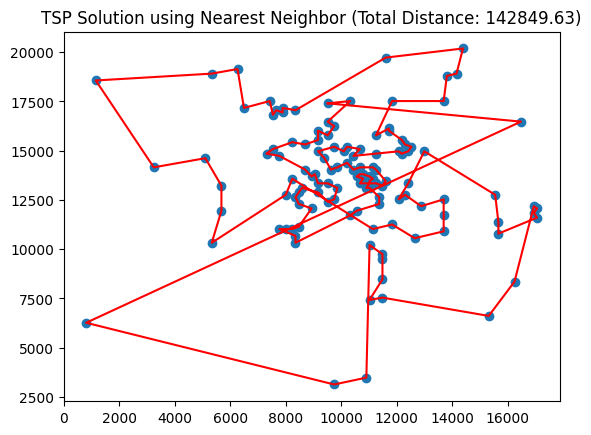

Average Tour Length: 134965.84044260572


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


bier127_NNHwith3OPT

Iteration 72: Improved total distance to 138422.22
Iteration 485: Improved total distance to 136015.48
Iteration 4845: Improved total distance to 134587.75
Iteration 149805: Improved total distance to 134464.05
Iteration 308393: Improved total distance to 134425.73
Iteration 317846: Improved total distance to 132590.51
Iteration 326148: Improved total distance to 132436.38
Iteration 453564: Improved total distance to 132190.38
Iteration 487505: Improved total distance to 131738.69
Iteration 488058: Improved total distance to 130104.95
Iteration 552235: Improved total distance to 130078.02
Iteration 562867: Improved total distance to 129856.13
Iteration 575460: Improved total distance to 129852.95
Iteration 632601: Improved total distance to 129691.59
Iteration 685595: Improved total distance to 129204.29
Iteration 874249: Improved total distance to 128749.07
Iteration 900648: Improved total distance to 128114.18
Iteration 1137157: Improved total distance to 127964.15
Iteration 1157524:

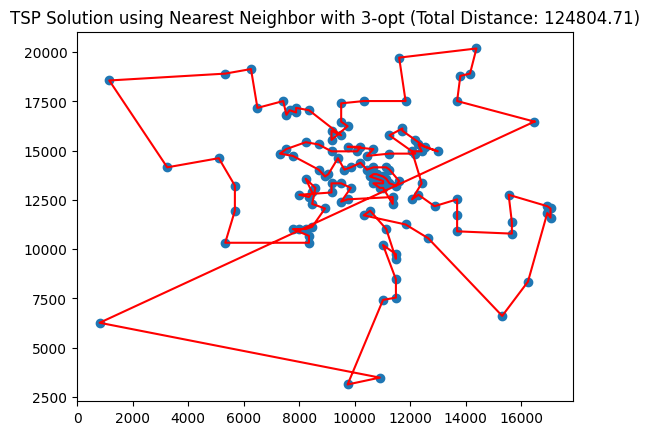

Average Tour Length: 124804.71


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "bier127.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []

# Run the solver three times
for _ in range(1):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print the average total distance
average_distance = sum(total_distances) / len(total_distances)
print(f"Average Tour Length: {average_distance:.2f}")
